# TensorFlow Limit

In [1]:
import pyhf
import json
import logging
import numpy as np
from pyhf import runOnePoint, Model
from pyhf.simplemodels import hepdata_like

def invert_interval(testmus,cls_obs, cls_exp, test_size = 0.05):
    point05cross = {'exp':[],'obs':None}
    for cls_exp_sigma in cls_exp:
        yvals = [x for x in cls_exp_sigma]
        point05cross['exp'].append(np.interp(test_size,list(reversed(yvals)),list(reversed(testmus))))
        
    yvals = cls_obs
    point05cross['obs'] = np.interp(test_size,list(reversed(yvals)),list(reversed(testmus)))
    return point05cross

def plot_results(testmus,cls_obs, cls_exp, test_size = 0.05):
    plt.plot(mutests,cls_obs, c = 'k')
    for i,c in zip(range(5),['grey','grey','grey','grey','grey']):
        plt.plot(mutests,cls_exp[i], c = c)
    plt.plot(testmus,[test_size]*len(testmus), c = 'r')
    plt.ylim(0,1)

In [2]:
import tensorflow as tf
pyhf.tensorlib =  pyhf.tensorflow_backend()
pyhf.tensorlib.session = tf.Session()
pyhf.optimizer = pyhf.tflow_optimizer(tensorlib=pyhf.tensorlib)

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


mutest 0.0
mutest 0.5
mutest 1.0
mutest 1.5
mutest 2.0
mutest 2.5
mutest 3.0
mutest 3.5
mutest 4.0
mutest 4.5
mutest 5.0


{'exp': [1.1150276131816024,
  1.4635556988173117,
  2.0273926814698786,
  2.900217861845774,
  3.971687240957603],
 'obs': 2.42005196648799}

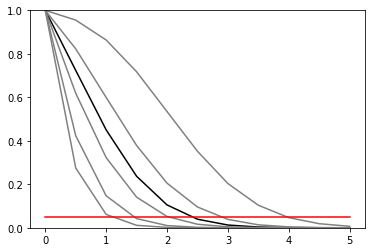

In [5]:
pdf  = hepdata_like([10.], [50.], [7.])
data = [55.] + pdf.config.auxdata

init_pars  = pdf.config.suggested_init()
par_bounds = pdf.config.suggested_bounds()

mutests = np.linspace(0,5,11)
tests = [runOnePoint(muTest, data, pdf, init_pars, par_bounds)[-2:] for muTest in mutests]
cls_obs = [test[0]  for test in tests]
cls_exp = [[test[1][i]  for test in tests] for i in range(5)]

plot_results(mutests, cls_obs, cls_exp)

invert_interval(mutests, cls_obs, cls_exp)